In [2]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("D:/Courses/Codebasics Python/Python Projects and Exercises/ML/13_kmeans/income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [4]:
df1 = df.drop(['Name'], axis = 'columns')

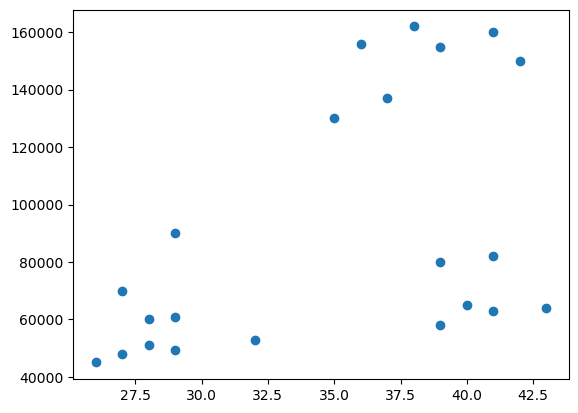

In [5]:
plt.scatter(df1['Age'], df1['Income($)'])

In [6]:
scaler = MinMaxScaler()
scaler.fit(df1[['Age', 'Income($)']])
df1[['Age', 'Income($)']] = scaler.transform(df1[['Age', 'Income($)']])
df1.head()

,Age,Income($)
0,0.058824,0.213675
1,0.176471,0.384615
2,0.176471,0.136752
3,0.117647,0.128205
4,0.941176,0.897436


 ### Before Jumping to Clustering Model, let's find the K value for the Model

In [13]:
k_rng = range(1, 10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters = k)
    km.fit(df1)
    sse.append(km.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


***To avoid the error message above^***

In [16]:
import os
os.environ['OMP_NUM_THREADS'] = '1'

 **Back to SSE**

In [14]:
sse

[18.388556966533635,
 5.945614491472593,
 0.4750783498553097,
 0.3625079900797329,
 0.2664030124668416,
 0.21578607765873023,
 0.17978078042439385,
 0.1425871182547609,
 0.11123550695239098]

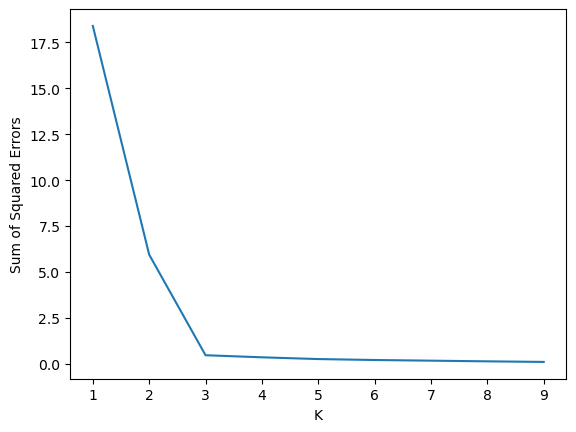

In [15]:
plt.xlabel('K')
plt.ylabel('Sum of Squared Errors')
plt.plot(k_rng, sse)

### ***Hurrah! Looks like we find the elbow! It seems like the elbow is at K = 3***

  ## Calling the K Means Cluster Model

In [7]:
km = KMeans(n_clusters=3)

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

 ### Fit & Predict. Previously we Fitted and then Predicted separately. ***Here, we will do it in one step***

In [ ]:
y_predicted = km.fit_predict(df1)
y_predicted

 **Visual Help**

In [11]:
df1['cluster'] = y_predicted
df1

,Age,Income($),cluster
0,0.058824,0.213675,1
1,0.176471,0.384615,1
2,0.176471,0.136752,1
3,0.117647,0.128205,1
4,0.941176,0.897436,0
5,0.764706,0.940171,0
6,0.882353,0.982906,0
7,0.705882,1.000000,0
8,0.588235,0.948718,0
9,0.529412,0.726496,0


 ### Plotting for Better Visuals

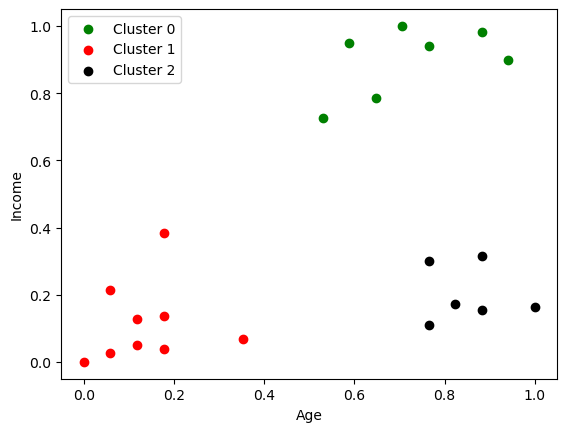

In [12]:
df01 = df1[df1.cluster == 0]
df02 = df1[df1.cluster == 1]
df03 = df1[df1.cluster == 2]

plt.scatter(df01.Age, df01['Income($)'], color='green', label='Cluster 0')
plt.scatter(df02.Age, df02['Income($)'], color='red', label='Cluster 1')
plt.scatter(df03.Age, df03['Income($)'], color='black', label='Cluster 2')

plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()